# RFM Analysis of eCommerce behavior data

[NoteBook](https://www.kaggle.com/code/arifsetiyawan/rfm-analysis-of-ecommerce-behavior-data)

In [2]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.


In [3]:
#Import Library
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import squarify

In [4]:
data_oct = pd.read_csv('ecommerce-behavior-data-from-multi-category-store/2019-Oct.csv',usecols=['event_time','event_type','price','user_id','user_session'])
data_nov = pd.read_csv('ecommerce-behavior-data-from-multi-category-store/2019-Nov.csv',usecols=['event_time','event_type','price','user_id','user_session'])

In [5]:
data_oct['event_type'].unique()

array(['view', 'purchase', 'cart'], dtype=object)

In [6]:
data_nov['event_type'].unique()

array(['view', 'cart', 'purchase'], dtype=object)

In [7]:
data_oct=data_oct.loc[data_oct.event_type == 'purchase']
data_nov=data_nov.loc[data_nov.event_type == 'purchase']

In [33]:
frames = [data_oct, data_nov]
data=pd.concat(frames)

In [34]:
data.head()

,event_time,event_type,price,user_id,user_session
162,2019-10-01 00:02:14 UTC,purchase,130.76,543272936,8187d148-3c41-46d4-b0c0-9c08cd9dc564
308,2019-10-01 00:04:37 UTC,purchase,642.69,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68
379,2019-10-01 00:06:02 UTC,purchase,29.51,514591159,0e5dfc4b-2a55-43e6-8c05-97e1f07fbb56
442,2019-10-01 00:07:07 UTC,purchase,54.42,555332717,1dea3ee2-2ded-42e8-8e7a-4e2ad6ae942f
574,2019-10-01 00:09:26 UTC,purchase,189.91,524601178,2af9b570-0942-4dcd-8f25-4d84fba82553


In [35]:
%%time
data['event_time']=pd.to_datetime(data['event_time']).dt.tz_convert(None)

CPU times: user 19.4 s, sys: 68.3 ms, total: 19.4 s
Wall time: 19.4 s


In [11]:
data.dtypes

event_time      datetime64[ns]
event_type              object
price                  float64
user_id                  int64
user_session            object
dtype: object

In [2]:
%%time
#save dataframe as feather in case our notebook got crashed
#feather save column data types
import pyarrow.feather as feather
os.makedirs('tmp', exist_ok=True)  # Make a temp dir for storing the feather file
feather.write_feather(data, './tmp/data')

NameError: name 'data' is not defined

In [4]:
%%time
#load the feather data cause feather more lightweight
data = pd.read_feather('./tmp/data')
data

CPU times: user 534 ms, sys: 305 ms, total: 839 ms
Wall time: 661 ms


,event_time,event_type,price,user_id,user_session
162,2019-10-01 00:02:14,purchase,130.76,543272936,8187d148-3c41-46d4-b0c0-9c08cd9dc564
308,2019-10-01 00:04:37,purchase,642.69,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68
379,2019-10-01 00:06:02,purchase,29.51,514591159,0e5dfc4b-2a55-43e6-8c05-97e1f07fbb56
442,2019-10-01 00:07:07,purchase,54.42,555332717,1dea3ee2-2ded-42e8-8e7a-4e2ad6ae942f
574,2019-10-01 00:09:26,purchase,189.91,524601178,2af9b570-0942-4dcd-8f25-4d84fba82553
...,...,...,...,...,...
67501725,2019-11-30 23:58:14,purchase,346.70,547804983,717566cf-ef93-4078-ba8f-169a3ac9f1a0
67501745,2019-11-30 23:58:22,purchase,1437.02,515582054,829c20b5-696e-4a8a-8a9f-171014a3ecbe
67501824,2019-11-30 23:58:57,purchase,235.60,579876821,ca50e291-43f3-4ca2-9e13-20ee6b8b25f0
67501863,2019-11-30 23:59:15,purchase,89.32,543733099,a65116f4-ac53-4a41-ad68-6606788e674c


In [7]:
grouped_data=data.groupby(by='user_session').agg(Date_order=('event_time','max'),
                                        user_id=('user_id','unique'),
                                          Quantity=('user_session','count'),
                                         money_spent=('price','sum')).reset_index(drop=True)
grouped_data

,Date_order,user_id,Quantity,money_spent
0,2019-10-06 11:34:30,[546521725],1,289.52
1,2019-10-25 08:39:11,[560486342],1,171.90
2,2019-11-02 08:35:35,[563180871],1,123.55
3,2019-11-11 03:35:34,[566954797],1,151.61
4,2019-10-17 13:37:59,[560744406],2,379.78
...,...,...,...,...
1402753,2019-11-18 11:20:56,[519523637],1,45.03
1402754,2019-11-17 10:59:07,[523658055],1,32.15
1402755,2019-11-25 10:56:59,[518862395],2,163.19
1402756,2019-11-17 05:52:00,[571263795],2,66.64


In [12]:
grouped_data['user_id'] = grouped_data['user_id'].astype('int')

### RFM Analysis

In [13]:
grouped_data['Date_order'].max()

Timestamp('2019-11-30 23:59:44')

In [14]:
import datetime as dt
study_date = dt.datetime(2019,12,1)
grouped_data=pd.DataFrame(grouped_data)
grouped_data['last_purchase']=study_date - grouped_data['Date_order']
grouped_data['last_purchase'].dt.days
grouped_data['last_purchase']=grouped_data['last_purchase'] / np.timedelta64(1, 'D')
grouped_data.head()

,Date_order,user_id,Quantity,money_spent,last_purchase
0,2019-10-06 11:34:30,546521725,1,289.52,55.517708
1,2019-10-25 08:39:11,560486342,1,171.90,36.639456
2,2019-11-02 08:35:35,563180871,1,123.55,28.641956
3,2019-11-11 03:35:34,566954797,1,151.61,19.850301
4,2019-10-17 13:37:59,560744406,2,379.78,44.431956


In [15]:
RFM= grouped_data.groupby('user_id').agg(Recency=('last_purchase','min'),
                                 Frequency=('user_id','count'),
                                 Monetary=('money_spent','sum'))
RFM.head()

,Recency,Frequency,Monetary
user_id,,,
138340325,19.758866,1,93.50
225644257,18.819780,1,40.91
253299396,24.546169,1,246.85
256164170,10.651921,1,113.23
264649825,55.141539,2,1240.04


In [16]:
RFM['Frequency'].describe()

count    697470.000000
mean          2.011209
std           2.979720
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         328.000000
Name: Frequency, dtype: float64

In [17]:
RFM['Recency'].describe()

count    697470.000000
mean         25.094585
std          17.223048
min           0.000185
25%          12.871965
50%          20.587141
75%          39.693811
max          60.995810
Name: Recency, dtype: float64

In [18]:
RFM.quantile(q=[0.25,0.5,0.75])

,Recency,Frequency,Monetary
0.25,12.871965,1.0,118.38
0.50,20.587141,1.0,257.15
0.75,39.693811,2.0,669.23


In [19]:
quartiles=RFM.quantile(q=[0.25,0.5,0.75]).to_dict()
quartiles

{'Recency': {0.25: 12.871964699074073,
  0.5: 20.587141203703705,
  0.75: 39.69381076388889},
 'Frequency': {0.25: 1.0, 0.5: 1.0, 0.75: 2.0},
 'Monetary': {0.25: 118.38, 0.5: 257.15, 0.75: 669.23}}

## Creation of RFM Segments

In [20]:
## for Recency 

def R(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
## for Frequency and Monetary 

def FM(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1  

In [21]:
#create RFM segmentation column
RFM['R_Quartile'] = RFM['Recency'].apply(R, args=('Recency',quartiles,))
RFM['F_Quartile'] = RFM['Frequency'].apply(FM, args=('Frequency',quartiles,))
RFM['M_Quartile'] = RFM['Monetary'].apply(FM, args=('Monetary',quartiles,))
RFM['RFM_segmentation'] = RFM.R_Quartile.map(str) \
                    + RFM.F_Quartile.map(str) \
                    + RFM.M_Quartile.map(str)
RFM['RFM_score'] = RFM.R_Quartile.map(int) \
                    + RFM.F_Quartile.map(int) \
                    + RFM.M_Quartile.map(int)
RFM.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_segmentation,RFM_score
user_id,,,,,,,,
138340325,19.758866,1,93.50,2,4,4,244,10
225644257,18.819780,1,40.91,2,4,4,244,10
253299396,24.546169,1,246.85,3,4,3,343,10
256164170,10.651921,1,113.23,1,4,4,144,9
264649825,55.141539,2,1240.04,4,2,1,421,7


In [22]:
# Define rfm_level function
def RFM_label(data):
    if data['RFM_score'] >= 10:
        return 'Lost'
    elif ((data['RFM_score'] >= 9) and (data['RFM_score'] < 10)):
        return 'Hibernating'
    elif ((data['RFM_score'] >= 8) and (data['RFM_score'] < 9)):
        return 'Can’t Lose Them'
    elif ((data['RFM_score'] >= 7) and (data['RFM_score'] < 8)):
        return 'About To Sleep'
    elif ((data['RFM_score'] >= 6) and (data['RFM_score'] < 7)):
        return 'Promising'
    elif ((data['RFM_score'] >= 5) and (data['RFM_score'] < 6)):
        return 'Potential Loyalist'
    elif ((data['RFM_score'] >= 4) and (data['RFM_score'] < 5)):
        return 'Loyal Customers'
    else:
        return 'Champions'
#Create RFM label for customer
RFM['RFM_label'] = RFM.apply(RFM_label, axis=1)
RFM.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_segmentation,RFM_score,RFM_label
user_id,,,,,,,,,
138340325,19.758866,1,93.50,2,4,4,244,10,Lost
225644257,18.819780,1,40.91,2,4,4,244,10,Lost
253299396,24.546169,1,246.85,3,4,3,343,10,Lost
256164170,10.651921,1,113.23,1,4,4,144,9,Hibernating
264649825,55.141539,2,1240.04,4,2,1,421,7,About To Sleep


In [23]:
# Calculate average values for each RFM_Level, and return a size of each segment 
RFM_desc = RFM.groupby('RFM_label').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
}).round(1)
# Print the aggregated dataset
print(RFM_desc)

                   Recency Frequency Monetary        
                      mean      mean     mean   count
RFM_label                                            
About To Sleep        20.5       1.7    628.8   71309
Can’t Lose Them       19.9       1.3    406.9   90809
Champions              5.1       7.9   3777.5   37405
Hibernating           22.5       1.1    309.2  114053
Lost                  38.6       1.0    141.1  231538
Loyal Customers       10.4       4.3   1897.9   40675
Potential Loyalist    16.8       3.5   1468.7   52728
Promising             21.1       2.5   1009.3   58953


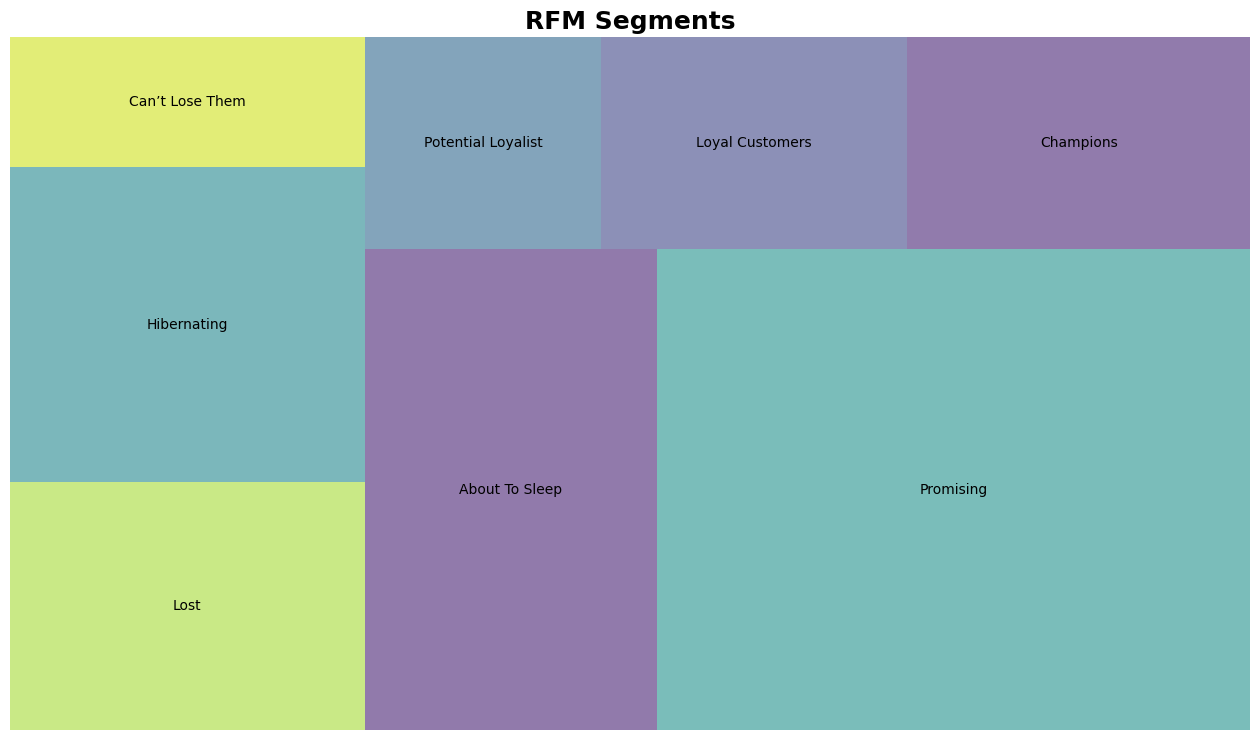

In [24]:
RFM_desc.columns = RFM_desc.columns.droplevel()
RFM_desc.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)
squarify.plot(sizes=RFM_desc['Count'], 
              label=['Lost',
                     'Hibernating',
                     'Can’t Lose Them',
                     'About To Sleep',
                     'Promising', 
                     'Potential Loyalist', 
                     'Loyal Customers',
                     'Champions'], alpha=.6 )
plt.title("RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()

In [ ]:
RFM_desc